# Covertype

Experiment 1 clusters for CovType dataset


In [8]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from cluster_func import kmeans
from cluster_func import em

In [3]:
data_full = pd.read_csv('data/covtype.data.csv', header=None)

In [4]:
#Randomly sample the data to reduce the size of dataset due to computation difficulty
RandInd = np.random.choice(len(data_full),30000)
data = data_full.iloc[RandInd,:].reset_index().drop(['index'], axis = 1)

X = data.iloc[:,:-1]
y = data.iloc[:,-1] - 1

#Splitting data into training and testing and keeping testing data aside
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

#Converting into numpy arrays
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()
y_train = y_train.as_matrix() - 1
y_test = y_test.as_matrix() - 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [5]:
#Preprocessing the data between 0 and 1
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

means_init = np.array([X[y == i].mean(axis=0) for i in range(7)])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


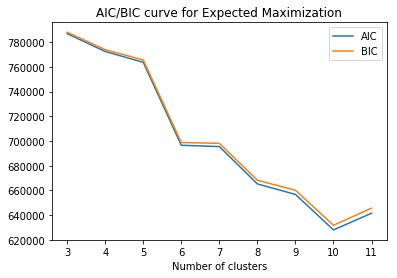

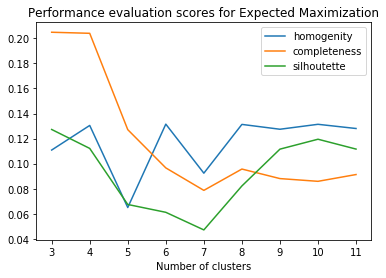

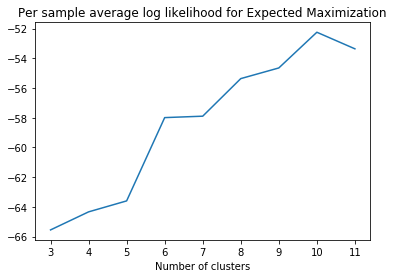

Training accuracy for Expected Maximization for K = 7:  0.46666666666666673
Testing accuracy for Expected Maximization for K = 7:  0.5333333333333333


([3, 4, 5, 6, 7, 8, 9, 10, 11],
 [786971.3361735911,
  772500.3086975516,
  763748.2157388497,
  696581.7725385458,
  695540.7275669932,
  665297.883818323,
  656798.4907076806,
  628067.0044489659,
  641572.1133387028],
 [788090.1551365422,
  773994.3004864025,
  765617.3803536004,
  698826.1099791962,
  698160.2378335434,
  668292.5669107729,
  660168.3466260303,
  631812.0331932154,
  645692.3149088521],
 [0.11086367923215593,
  0.13050162477267016,
  0.06498465142475623,
  0.13153884676145153,
  0.09240215881662883,
  0.13132679462706018,
  0.12746564994895795,
  0.13140963256421814,
  0.12805549194735646],
 [0.20489046279030917,
  0.20404407493719573,
  0.12714415739126617,
  0.09661579981209115,
  0.07867146873254156,
  0.09569683669741011,
  0.08808291532676873,
  0.08589797788327198,
  0.09131226468941137],
 [0.12727921375547985,
  0.11216581709900102,
  0.06741778093688655,
  0.061160691263470936,
  0.04710887113113114,
  0.0822001892708699,
  0.11158013499622425,
  0.11949801

In [6]:
##############################################################################################################################
#For Expected Maximization
em(X_train, X_test, y_train, y_test, init_means = means_init, component_list = [3,4,5,6,7,8,9,10,11], num_class = 7)

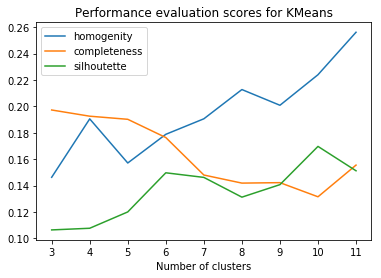

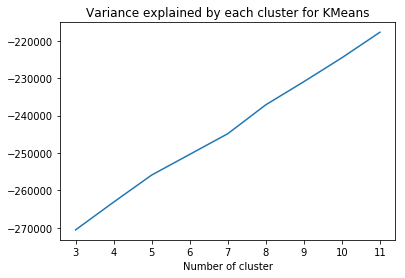

Training accuracy for KMeans for K = 7:  4.4375
Testing accuracy for KMeans for K = 7:  4.25


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


([3, 4, 5, 6, 7, 8, 9, 10, 11],
 [0.14631289536166478,
  0.19054587253416075,
  0.15714693533606103,
  0.17885801054191058,
  0.19061010572444842,
  0.21275889234636464,
  0.20085089561137126,
  0.22399183433870024,
  0.25615594833019],
 [0.19728384525475243,
  0.1925812017988579,
  0.19023058403177795,
  0.17642335563022155,
  0.1480396726580284,
  0.1419142477287995,
  0.1422593211408514,
  0.13155248972931238,
  0.1555552980285863],
 [0.10646788341347801,
  0.10772538498140394,
  0.12009014003554729,
  0.14972277875980747,
  0.14623432225227256,
  0.13127620119881284,
  0.1407515353283033,
  0.16970592718628968,
  0.15124629002893203],
 [-270592.98530401033,
  -263163.9642151555,
  -255921.44278705545,
  -250394.3657302239,
  -244867.52051435923,
  -237131.07315289316,
  -230945.45923201225,
  -224550.5550132104,
  -217718.61559764564])

In [7]:
#############################################################################################################################
#For KMeans
kmeans(X_train, X_test, y_train, y_test, init_means = means_init, component_list = [3,4,5,6,7,8,9,10,11], num_class = 7)